# Predicting Credit Score using Decision Trees

### Importing Libraries

In [1]:
%matplotlib inline
import numpy as np     
import pandas as pd

# for creating plots
import matplotlib.pyplot as plt 

# for splitting of data sets
from sklearn.model_selection import train_test_split 

# importing Decision Tree Classifier from scikit learn
from sklearn.tree import DecisionTreeClassifier  

# visualizing the decision tree
from adspy_shared_utilities import plot_decision_tree       

### Reading Data Set

In [2]:
# importing data file in csv format
df2 = pd.read_csv('data.csv')    

# show first 5 rows of the data set 
df2.head()                            

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPEND,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


### Splitting data set to training set and data set

In [3]:
feature_names_data = ['CHK_ACCT', 'HISTORY','DURATION','NEW_CAR','USED_CAR','FURNITURE','RADIO/TV','EDUCATION','RETRAINING','AMOUNT','SAV_ACCT','EMPLOYMENT','INSTALL_RATE','MALE_DIV','MALE_SINGLE','MALE_MAR','CO-APPLICANT','GUARANTOR','TIME_RES','REAL_ESTATE','PROP_NONE','AGE','OTHER_INSTALL','RENT','OWN_RES','NUM_CREDITS','JOB','NUM_DEPEND','TELEPHONE','FOREIGN']
target_names_data = ['0', '1']

# independent variables
X_data = df2[feature_names_data]

# dependent variable
y_data = df2['RESPONSE']              

# splitting data set for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=0)    

### Decision Tree (without pruning)

In [4]:
# Fitting of training data to Decision Tree Classifier without pruning
clf = DecisionTreeClassifier().fit(X_train, y_train)                     

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.68


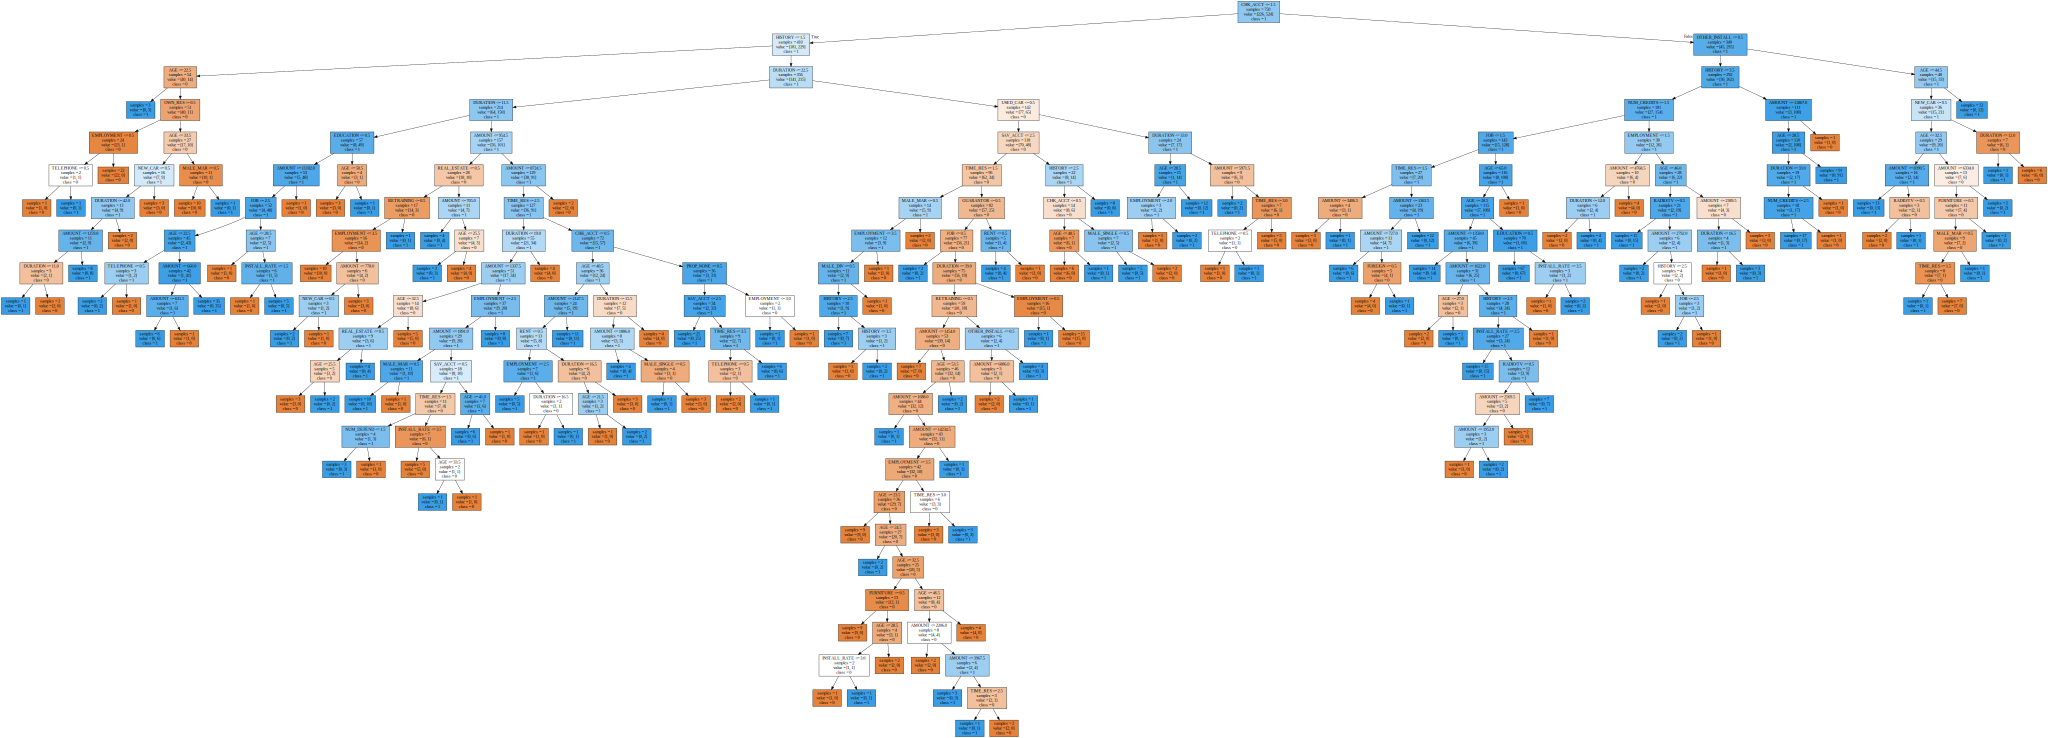

In [5]:
# Decision Tree visualization with no pruning
plot_decision_tree(clf, feature_names_data, target_names_data)

### Decision Tree (max_depth = 2)

In [6]:
# Fitting of training data to Decision Tree Classifier with maximum depth of 2
clf2 = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.73
Accuracy of Decision Tree classifier on test set: 0.70


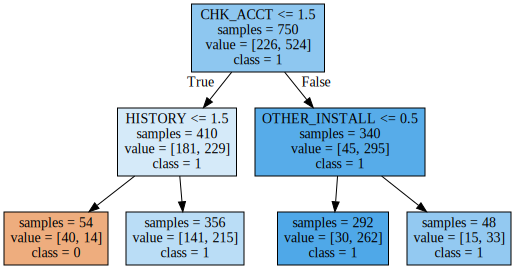

In [7]:
plot_decision_tree(clf2, feature_names_data, target_names_data)

### Decision Tree (max_depth = 3)

In [8]:
# Fitting of training data to Decision Tree Classifier with maximum depth of 3
clf3 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf3.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf3.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.75
Accuracy of Decision Tree classifier on test set: 0.73


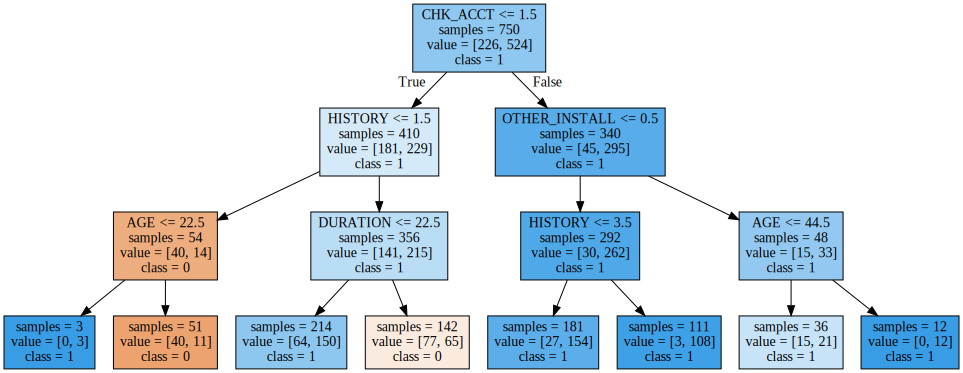

In [9]:
plot_decision_tree(clf3, feature_names_data, target_names_data)

### Decision Tree (max_depth = 4)

In [10]:
# Fitting of training data to Decision Tree Classifier with maximum depth of 4
clf4 = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf4.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf4.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.77
Accuracy of Decision Tree classifier on test set: 0.72


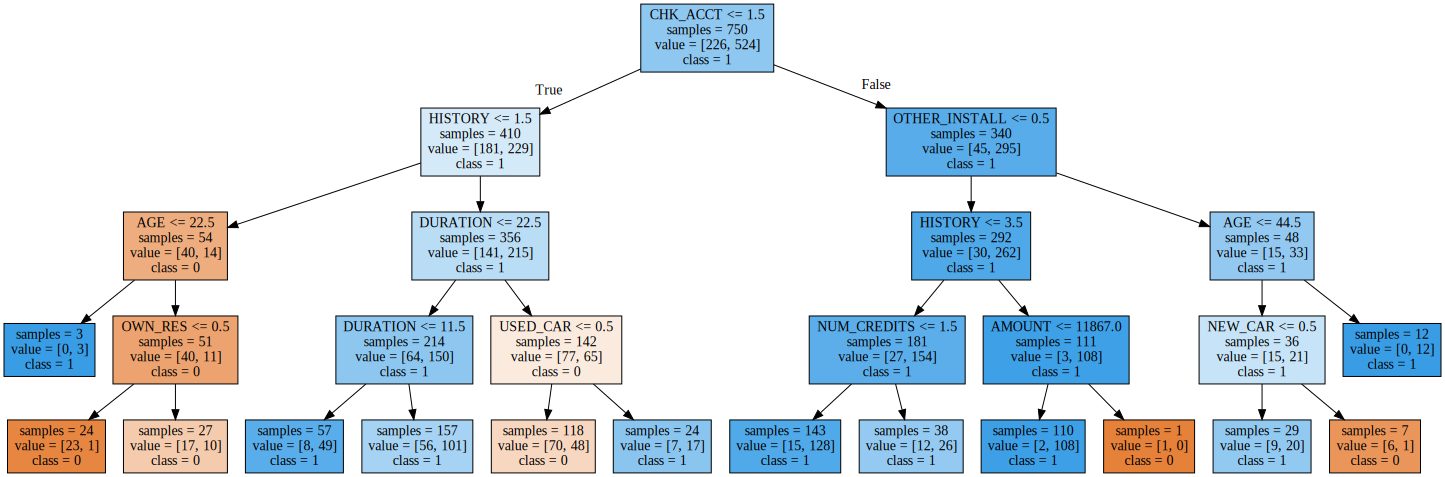

In [11]:
plot_decision_tree(clf4, feature_names_data, target_names_data)

### Overfitting of Decision Trees

In [12]:
#Comparing Accuracy of Decision trees with different depths
Accuracy_Train = []
Accuracy_Test = []
maxdepth = []
for i in range (1,20):
    DTC = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
    maxdepth.append(i)
    Accuracy_Train.append(DTC.score(X_train, y_train))
    Accuracy_Test.append(DTC.score(X_test, y_test))

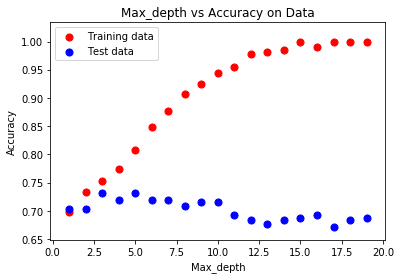

In [13]:
#Plotting the accuracy vs max_depth of Decision Tree classifier
plt.figure()

# add a label to the x axis
plt.xlabel('Max_depth')

# add a label to the y axis
plt.ylabel('Accuracy')

# add a title
plt.title('Max_depth vs Accuracy on Data')

#scatter plot for max_depth vs Accuracy on Training data 
plt.scatter(maxdepth, Accuracy_Train, s=50, c="red")

#scatter plot for max_depth vs Accuracy on Testing data 
plt.scatter(maxdepth, Accuracy_Test, s=50, c="blue")

# add a legend 
plt.legend(['Training data', 'Test data'])

### Feature Importance

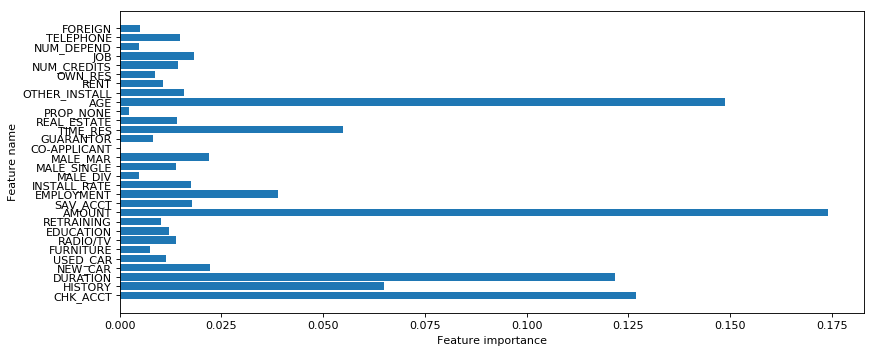

Feature importances: [0.12683631 0.06494258 0.12167864 0.02229846 0.01148565 0.00736533
 0.01388775 0.01214664 0.01009409 0.17413849 0.01769476 0.03882401
 0.01756702 0.00466352 0.01379728 0.02193193 0.         0.00826683
 0.05485356 0.01401233 0.00232837 0.14871409 0.01570929 0.01068056
 0.00869432 0.01443787 0.01835649 0.00474988 0.01477741 0.00506654]


In [14]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(12,5), dpi=80)
plot_feature_importances(clf, feature_names_data)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

### Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
tree_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier \n', confusion)

Decision tree classifier 
 [[ 35  39]
 [ 40 136]]


In [16]:
from sklearn.metrics import confusion_matrix
tree_predicted = clf2.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[  7  67]
 [  7 169]]


In [17]:
from sklearn.metrics import confusion_matrix
tree_predicted = clf3.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 3)\n', confusion)

Decision tree classifier (max_depth = 3)
 [[ 38  36]
 [ 31 145]]
